In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf




## ACF

* Generate and plot white noise data

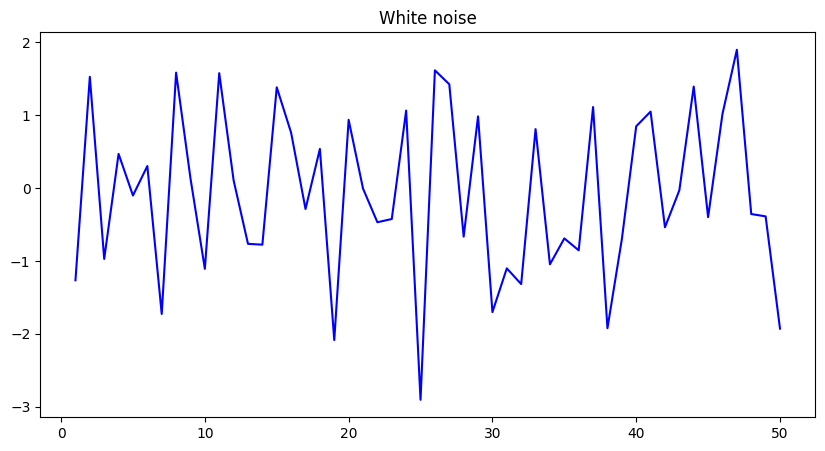

In [41]:
np.random.seed(30)

# Criando uma série de tempo com ruído branco
n = 50
index = np.arange(1, n + 1)
wn = np.random.normal(size=n)
y = pd.Series(wn, index=index, name='sample')

# Plotando a série temporal
plt.figure(figsize=(10, 5))
plt.plot(y, color='b',  linestyle='-')
plt.title('White noise')
plt.ylabel('')
plt.show()

* Plot the white noise ACF

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


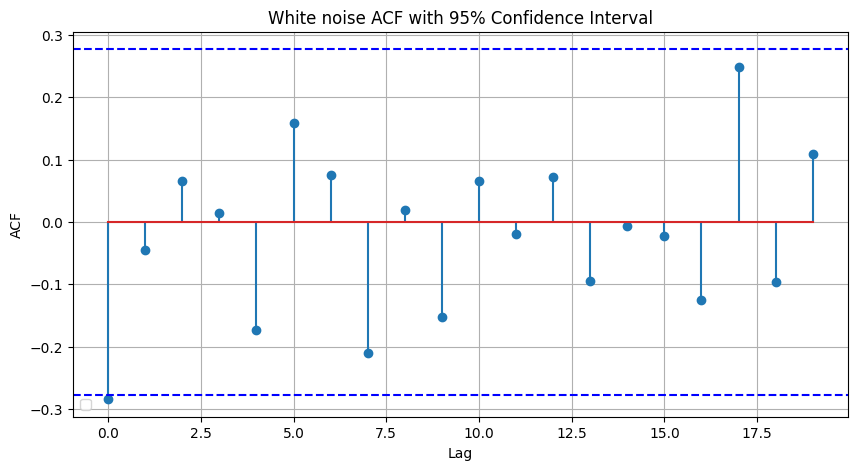

In [42]:
# Calculando a função de autocorrelação (ACF)
acf = sm.tsa.acf(wn, nlags=20)

# Calculando o valor crítico (z) para o intervalo de confiança de 95%
alpha = 0.05
z = 1.96  # z para alfa/2 = 0.025 (valor crítico de 1 - alfa/2)

# Calculando os limites do intervalo de confiança
lower_confint = -z / np.sqrt(n)
upper_confint = z / np.sqrt(n)

# Remover o primeiro valor da lista
acf = acf[1:]

# Plotando a função de autocorrelação (ACF) com o intervalo de confiança
plt.figure(figsize=(10, 5))
plt.stem(range(20), acf)
plt.axhline(y=lower_confint, color='blue', linestyle='--')
plt.axhline(y=upper_confint, color='blue', linestyle='--')
plt.title('White noise ACF with 95% Confidence Interval')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid()
plt.show()

## Simple forecasting methods to use as baseline

* Prepare the dataset: Bricks produced in Australia